In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import glob

from scipy.signal import find_peaks
from scipy.interpolate import interp1d 


from IPython import display

### Upload data

In [71]:
path = r'C:\Users\ecath\Desktop\Research\Raw Data\Spectrum LD'
path_welch = r'C:\Users\ecath\Desktop\Research\Raw Data\Spectrum LD Welch'

In [72]:
el_sig = pd.read_csv(path + '\Spectrum of electrode LD.csv', index_col=0)
om_sig = pd.read_csv(path + '\Spectrum of optical LD.csv', index_col=0)

el_welch = pd.read_csv(path_welch + '\Spectrum of electrode LD Welch.csv', index_col=0)
om_welch = pd.read_csv(path_welch + '\Spectrum of optical LD Welch.csv', index_col=0)

In [73]:
el_sig.drop(['target'], inplace=True)
om_sig.drop(['target'], inplace=True)

el_welch.drop(['target'], inplace=True)
om_welch.drop(['target'], inplace=True)

In [7]:
i=0
j=2

a = el_sig[el_sig.columns[i:i+2]]
b = el_sig[el_sig.columns[j:j+2]]
new_cols = {x: y for x, y in zip(a.columns, b.columns)}
df_out = b.append(a.rename(columns=new_cols))

In [6]:
from tqdm import tqdm

def full_spectrum(df):   
    j=2
    a = df[df.columns[:2]]
    for j in tqdm(range(2, df.shape[1], 2)):
        b = df[df.columns[j:j+2]]
        new_cols = {x: y for x, y in zip(a.columns, b.columns)}
        df_out = b.append(a.rename(columns=new_cols))
        a = df_out
        j += 2
    return df_out

fc = full_spectrum(el_sig)
fc_welch = full_spectrum(el_welch)

100%|████████████████████████████████████████████████████████████████████████████████| 880/880 [00:11<00:00, 78.73it/s]


In [7]:
# fc.sort_values(by=['Bsk 1 H8_xf.16'])
# fc.reindex(index=np.arange(1, fc.shape[1]))
# fc = pd.DataFrame(fc, index = np.arange(1, fc.shape[1]))

fc.index = np.arange(1, fc.shape[0]+1)
fc_sorted = fc.sort_values(by=['Bsk 1 H8_xf.10'])

In [8]:
fc_welch.index = np.arange(1, fc_welch.shape[0]+1)

fc_sorted_welch = fc_welch.sort_values(by=['Bsk 1 H8_xf.10'])

In [9]:
x = fc_sorted[fc_sorted.columns[1]]
signal = fc_sorted[fc_sorted.columns[0]]

x = x[x != 0]
signal = signal[signal != 0]

In [10]:
x_welch = fc_sorted_welch[fc_sorted_welch.columns[1]]
signal_welch = fc_sorted_welch[fc_sorted_welch.columns[0]]

x_welch = x_welch[x_welch != 0]
signal_welch = signal_welch[signal_welch != 0]

In [11]:
print(np.argmax(signal), x[np.argmax(signal)])
print(np.argmax(signal_welch), x_welch[np.argmax(signal_welch)])

C:\Users\ecath\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


259269 8.56919179587352
144069 8.56919179587352


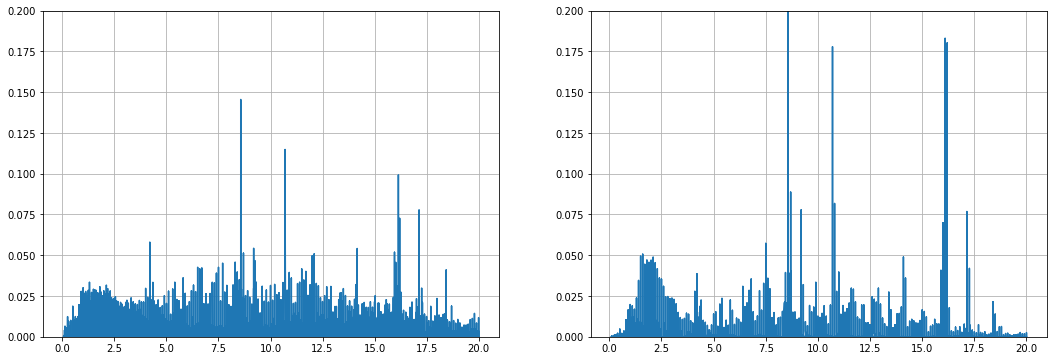

In [12]:
plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.plot(x, signal)
plt.ylim(0, 0.20)
plt.grid()


plt.subplot(122)
plt.plot(x_welch, signal_welch)
plt.ylim(0, 0.20)
plt.grid()

# plt.savefig(r'C:\Users\ecath\Desktop\full welch.png', format= 'png')

plt.show()

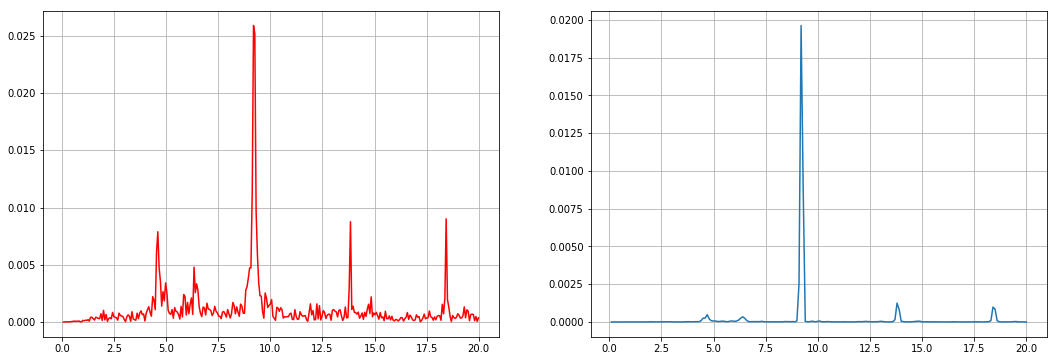

In [13]:
x = el_sig[el_sig.columns[101]]
y = el_sig[el_sig.columns[100]]

x = x[x != 0]
y = y[y != 0]

x_welch = el_welch[el_welch.columns[101]]
y_welch = el_welch[el_welch.columns[100]]

plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.plot(x, y, 'r')
plt.grid()


plt.subplot(122)
plt.plot(x_welch, y_welch)
plt.grid()

# plt.savefig(r'C:\Users\ecath\Desktop\welch.png', format= 'png')

plt.show()

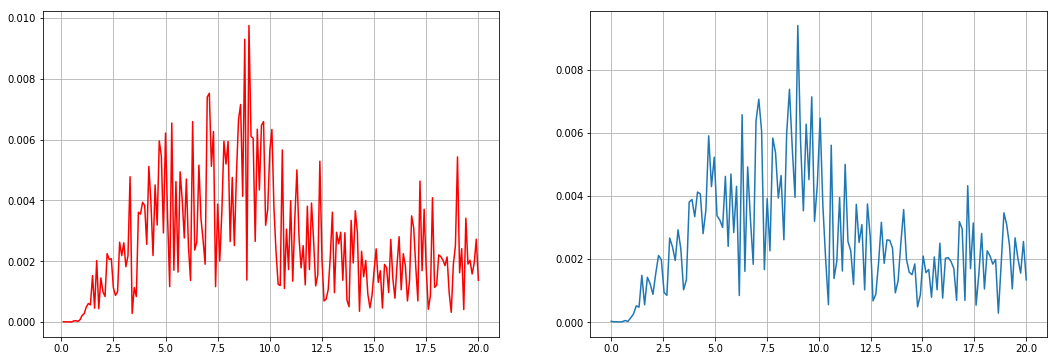

In [14]:
from scipy.interpolate import InterpolatedUnivariateSpline, UnivariateSpline, BSpline, BarycentricInterpolator, Rbf, splprep, splev

x = el_sig[el_sig.columns[1]]
signal = el_sig[el_sig.columns[0]]

# x = fc_sorted[fc_sorted.columns[1]]
# signal = fc_sorted[fc_sorted.columns[0]]

x = x[x != 0]
signal = signal[signal != 0]

fig = plt.figure(figsize=(18, 6))
ax = fig.subplots(1, 2)

ax[0].plot(x, signal, 'r', ms=3)
ax[0].grid()
# tck, u = splprep([x, signal], s=0, k=3)

spl = InterpolatedUnivariateSpline(x, signal)

xs = np.linspace(0, 20, 150)
ys = spl(xs)
# ys = splev(xs, tck)
ax[1].plot(xs, ys)
ax[1].grid()
# plt.savefig(r'C:\Users\ecath\Desktop\interpolation.png', format= 'png')
plt.show()

147 9.189586766770432


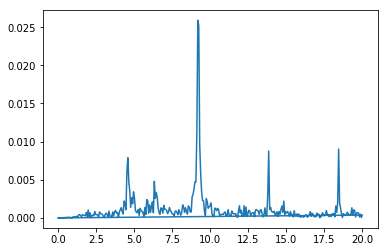

In [15]:
y = el_sig[el_sig.columns[100]]
x = el_sig[el_sig.columns[101]]
# x = el_welch[el_welch.columns[101]]
# y = el_welch[el_welch.columns[100]]

print(np.argmax(y), x[np.argmax(y)])
plt.plot(x, y)
plt.show()

(250,)
(250,)
(322,)


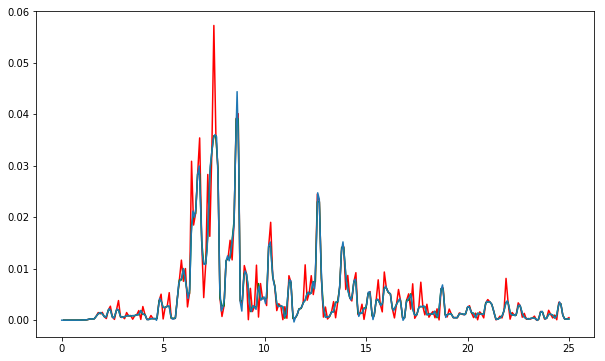

In [45]:
from scipy.signal import medfilt
from scipy.interpolate import InterpolatedUnivariateSpline, UnivariateSpline, BSpline, make_interp_spline, Rbf

y = el_sig[el_sig.columns[12]]
x = el_sig[el_sig.columns[13]]
print(y.shape)

# x = fc_sorted[fc_sorted.columns[1]]
# y = fc_sorted[fc_sorted.columns[0]]

y_filtered = medfilt(y, kernel_size=3)

x = x[x != 0]
y = y[y != 0]
print(y.shape)


signal = y_filtered[y_filtered != 0]

fig = plt.figure(figsize=(10, 6))
plt.plot(x, y, 'r')


spl = InterpolatedUnivariateSpline(x, signal)
plt.plot(x, signal, 'g', ms=3)

xs = np.linspace(0, 25, 322)
ys = spl(xs)
print(ys.shape)

plt.plot(xs, ys)

plt.show()

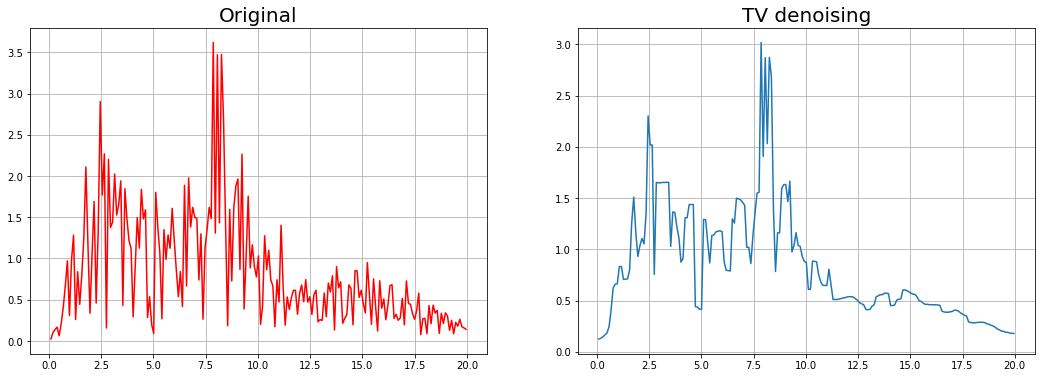

In [16]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from skimage.restoration import denoise_tv_chambolle, denoise_wavelet

y = om_sig[om_sig.columns[0]]
x = om_sig[om_sig.columns[1]]

# x = fc_sorted[fc_sorted.columns[1]]
# y = fc_sorted[fc_sorted.columns[0]]

# x_welch = fc_sorted_welch[fc_sorted_welch.columns[1]]
# y_welch = fc_sorted_welch[fc_sorted_welch.columns[0]]

x = x[x != 0]
y = y[y != 0]

# x_welch = x_welch[x_welch != 0]
# y_welch = y_welch[y_welch != 0]

tv_denoised = denoise_tv_chambolle(y, weight=0.3)
# tv_denoised_welch = denoise_tv_chambolle(y_welch, weight=0.001)


plt.figure(figsize=(18, 6))
plt.ylim(0, 20)

plt.subplot(121)
plt.plot(x, y, 'r')
plt.grid()
plt.title('Original', fontsize=20)

plt.subplot(122)
plt.plot(x, tv_denoised)
plt.grid()
plt.title('TV denoising', fontsize=20)


# plt.subplot(223)
# plt.plot(x_welch, y_welch)
# plt.grid()
# plt.title('Original Welch', fontsize=20)
# plt.xlim(0, 20)


# plt.subplot(224)
# plt.plot(x_welch, tv_denoised_welch)
# plt.grid()
# plt.title('TV denoising Welch', fontsize=20)
# plt.xlim(0, 20)

# plt.savefig(r'C:\Users\ecath\Desktop\tv denoising.png', format='PNG')
plt.show()



In [63]:
from tqdm import tqdm_notebook

tv_spectrum = pd.DataFrame()

for i in tqdm_notebook(range(om_sig.shape[1]//2)):
    x = om_sig[om_sig.columns[1::2]].iloc[:, i]
    y = om_sig[om_sig.columns[::2]].iloc[:, i]
    x = x[x != 0]
    y = y[y != 0]
    tv_denoised = denoise_tv_chambolle(y, weight=0.1)
    tv_spectrum = pd.concat([tv_spectrum, tv_denoised, x], axis=1, sort=False)


In [64]:
el_sig = pd.read_csv(path + '\Spectrum of electrode LD.csv', index_col=0)

pd.DataFrame(el_sig.iloc[-1,:]).transpose(

,Bsk 1 F7_yf,Bsk 1 F7_xf,Bsk 1 F8_yf,Bsk 1 F8_xf,Bsk 1 G6_yf,Bsk 1 G6_xf,Bsk 1 G7_yf,Bsk 1 G7_xf,Bsk 1 G8_yf,Bsk 1 G8_xf,...,Bsk 1 H4_yf.14,Bsk 1 H4_xf.14,Bsk 1 H5_yf.14,Bsk 1 H5_xf.14,Bsk 1 H6_yf.14,Bsk 1 H6_xf.14,Bsk 1 H7_yf.14,Bsk 1 H7_xf.14,Bsk 1 H8_yf.10,Bsk 1 H8_xf.10
target,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
tv_spectrum.fillna(0, inplace=True)
tv_spectrum = pd.concat([tv_spectrum, pd.DataFrame(el_sig.iloc[-1,:]).transpose()], axis=0)

In [68]:
tv_spectrum.to_csv(r'C:\Users\ecath\Desktop\Research\Raw Data\Spectrum LD\Spectrum of electrode LD denoised.csv')

In [70]:
pd.read_csv(r'C:\Users\ecath\Desktop\Research\Raw Data\Spectrum LD\Spectrum of electrode LD denoised.csv', index_col=0)

,Bsk 1 F7_yf,Bsk 1 F7_xf,Bsk 1 F8_yf,Bsk 1 F8_xf,Bsk 1 G6_yf,Bsk 1 G6_xf,Bsk 1 G7_yf,Bsk 1 G7_xf,Bsk 1 G8_yf,Bsk 1 G8_xf,...,Bsk 1 H4_yf.14,Bsk 1 H4_xf.14,Bsk 1 H5_yf.14,Bsk 1 H5_xf.14,Bsk 1 H6_yf.14,Bsk 1 H6_xf.14,Bsk 1 H7_yf.14,Bsk 1 H7_xf.14,Bsk 1 H8_yf.10,Bsk 1 H8_xf.10
0,0.000028,0.099995,0.000048,0.099995,0.000153,0.099995,0.000159,0.099995,0.000141,0.099995,...,0.001622,0.124191,0.000488,0.124191,0.000212,0.124191,0.000296,0.124191,0.000274,0.124191
1,0.000031,0.199990,0.000050,0.199990,0.000160,0.199990,0.000157,0.199990,0.000141,0.199990,...,0.001627,0.248382,0.000519,0.248382,0.000221,0.248382,0.000306,0.248382,0.000282,0.248382
2,0.000036,0.299985,0.000055,0.299985,0.000174,0.299985,0.000171,0.299985,0.000143,0.299985,...,0.001673,0.372574,0.000574,0.372574,0.000242,0.372574,0.000330,0.372574,0.000301,0.372574
3,0.000047,0.399980,0.000061,0.399980,0.000197,0.399980,0.000170,0.399980,0.000144,0.399980,...,0.004203,0.496765,0.000658,0.496765,0.000275,0.496765,0.000362,0.496765,0.000326,0.496765
4,0.000061,0.499975,0.000070,0.499975,0.000229,0.499975,0.000197,0.499975,0.000149,0.499975,...,0.004204,0.620956,0.000897,0.620956,0.000332,0.620956,0.000389,0.620956,0.000349,0.620956
5,0.000084,0.599971,0.000082,0.599971,0.000272,0.599971,0.000214,0.599971,0.000154,0.599971,...,0.003835,0.745147,0.000993,0.745147,0.000387,0.745147,0.000446,0.745147,0.000380,0.745147
6,0.000113,0.699966,0.000097,0.699966,0.000328,0.699966,0.000257,0.699966,0.000164,0.699966,...,0.003853,0.869338,0.001050,0.869338,0.000456,0.869338,0.000513,0.869338,0.000414,0.869338
7,0.000153,0.799961,0.000114,0.799961,0.000400,0.799961,0.000301,0.799961,0.000178,0.799961,...,0.006363,0.993529,0.001274,0.993529,0.000541,0.993529,0.000560,0.993529,0.000451,0.993529
8,0.000209,0.899956,0.000135,0.899956,0.000497,0.899956,0.000374,0.899956,0.000198,0.899956,...,0.004835,1.117721,0.001304,1.117721,0.000587,1.117721,0.000668,1.117721,0.000504,1.117721
9,0.000287,0.999951,0.000160,0.999951,0.000616,0.999951,0.000525,0.999951,0.000226,0.999951,...,0.004825,1.241912,0.001365,1.241912,0.000619,1.241912,0.000711,1.241912,0.000549,1.241912


In [186]:
print(np.argmax(y), x[np.argmax(y)])
print(np.argmax(tv_denoised), x[np.argmax(tv_denoised)])

68 6.899660867000886
68 6.899660867000886
